<a href="https://colab.research.google.com/github/gauravksingh16/speech-emotion-recognition-CNN-LSTM/blob/main/SER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d dmitrybabko/speech-emotion-recognition-en

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [6]:
! unzip /content/speech-emotion-recognition-en.zip

unzip:  cannot find or open /content/speech-emotion-recognition-en.zip, /content/speech-emotion-recognition-en.zip.zip or /content/speech-emotion-recognition-en.zip.ZIP.


In [7]:
import kagglehub
import os

# Download datasets using kagglehub
r_path = kagglehub.dataset_download("uwrfkaggler/ravdess-emotional-speech-audio")
c_path = kagglehub.dataset_download("ejlok1/cremad")
s_path =  kagglehub.dataset_download("ejlok1/surrey-audiovisual-expressed-emotion-savee")
t_path = kagglehub.dataset_download("ejlok1/toronto-emotional-speech-set-tess")

# Correct path joining
RAVDESS = os.path.join(r_path, 'audio_speech_actors_01-24')
CREMA = os.path.join(c_path, 'AudioWAV')
SAVEE = os.path.join(s_path, 'ALL')
TESS = os.path.join(t_path, 'TESS Toronto emotional speech set data')


In [8]:
import os
import pandas as pd

In [9]:
ravdess_dir_lis = os.listdir(RAVDESS)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    '03' : 'happy',
    '01' : 'neutral',
    '04' : 'sad',
    '05' : 'angry',
    '06' : 'fear',
    '07' : 'disgust',
    '08' : 'surprise',
}

for directory in ravdess_dir_lis:
    actor_files = os.listdir(os.path.join(RAVDESS, directory))
    for audio_file in actor_files:
        part = audio_file.split('.')[0]
        key = part.split('-')[2]
        if key in emotion_dic:
            gender_code = int(part.split('-')[6])
            path_list.append(f"{RAVDESS}/{directory}/{audio_file}")
            gender_list.append('female' if gender_code & 1 == 0 else 'male')
            emotion_list.append(emotion_dic[key])

ravdess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

ravdess_df.head()

,path,sex,emotion
0,/kaggle/input/ravdess-emotional-speech-audio/a...,female,surprise
1,/kaggle/input/ravdess-emotional-speech-audio/a...,female,neutral
2,/kaggle/input/ravdess-emotional-speech-audio/a...,female,disgust
3,/kaggle/input/ravdess-emotional-speech-audio/a...,female,disgust
4,/kaggle/input/ravdess-emotional-speech-audio/a...,female,neutral


In [10]:
crema_dir_list = os.listdir(CREMA)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'HAP' : 'happy',
    'NEU' : 'neutral',
    'SAD' : 'sad',
    'ANG' : 'angry',
    'FEA' : 'fear',
    'DIS' : 'disgust',
}

female_id_list = [
    '1002', '1003', '1004', '1006', '1007', '1008', '1009', '1010', '1012', '1013', '1018',
    '1020', '1021', '1024', '1025', '1028', '1029', '1030', '1037', '1043', '1046', '1047',
    '1049', '1052', '1053', '1054', '1055', '1056', '1058', '1060', '1061', '1063', '1072',
    '1073', '1074', '1075', '1076', '1078', '1079', '1082', '1084', '1089', '1091',
]

for audio_file in crema_dir_list:
    part = audio_file.split('_')
    key = part[2]
    if key in emotion_dic and part[3] == 'HI.wav':
        path_list.append(f"{CREMA}/{audio_file}")
        gender_list.append('female' if part[0] in female_id_list else 'male')
        emotion_list.append(emotion_dic[key])

crema_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

crema_df.head()

,path,sex,emotion
0,/kaggle/input/cremad/AudioWAV/1032_IEO_HAP_HI.wav,male,happy
1,/kaggle/input/cremad/AudioWAV/1076_IEO_FEA_HI.wav,female,fear
2,/kaggle/input/cremad/AudioWAV/1056_IEO_ANG_HI.wav,female,angry
3,/kaggle/input/cremad/AudioWAV/1038_IEO_SAD_HI.wav,male,sad
4,/kaggle/input/cremad/AudioWAV/1043_IEO_DIS_HI.wav,female,disgust


In [11]:
tess_dir_list = os.listdir(TESS)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'happy': 'happy',
    'neutral': 'neutral',
    'sad': 'sad',
    'angry': 'angry',
    'fear': 'fear',
    'disgust': 'disgust',
}

def add_surprise_emotion(emotion):
    if emotion.lower() not in emotion_dic:
        return 'surprise'
    return emotion_dic[emotion.lower()]

for directory in tess_dir_list:
    audio_files = os.listdir(os.path.join(TESS, directory))
    for audio_file in audio_files:
        part = audio_file.split('.')[0]
        key = part.split('_')[2]
        emotion = add_surprise_emotion(key)
        path_list.append(f"{TESS}/{directory}/{audio_file}")
        gender_list.append('female')  # female only dataset
        emotion_list.append(emotion)

tess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

tess_df.head()

,path,sex,emotion
0,/kaggle/input/toronto-emotional-speech-set-tes...,female,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,female,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,female,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,female,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,female,fear


In [12]:
savee_dir_list = os.listdir(SAVEE)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'h'  : 'happy',
    'n'  : 'neutral',
    'sa' : 'sad',
    'a'  : 'angry',
    'f'  : 'fear',
    'd'  : 'disgust'
}

for audio_file in savee_dir_list:
    part = audio_file.split('_')[1]
    key = part[:-6]
    if key in emotion_dic:
        path_list.append(f"{SAVEE}/{audio_file}")
        gender_list.append('male')  # male only dataset
        emotion_list.append(emotion_dic[key])
    else:
        path_list.append(f"{SAVEE}/{audio_file}")
        gender_list.append('male')  # male only dataset
        emotion_list.append('surprise')

savee_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

savee_df.head()

,path,sex,emotion
0,/kaggle/input/surrey-audiovisual-expressed-emo...,male,happy
1,/kaggle/input/surrey-audiovisual-expressed-emo...,male,fear
2,/kaggle/input/surrey-audiovisual-expressed-emo...,male,happy
3,/kaggle/input/surrey-audiovisual-expressed-emo...,male,disgust
4,/kaggle/input/surrey-audiovisual-expressed-emo...,male,angry


In [13]:
final_df = pd.concat([ravdess_df, crema_df, tess_df, savee_df], ignore_index=True)
final_df.shape
final_df.head()

,path,sex,emotion
0,/kaggle/input/ravdess-emotional-speech-audio/a...,female,surprise
1,/kaggle/input/ravdess-emotional-speech-audio/a...,female,neutral
2,/kaggle/input/ravdess-emotional-speech-audio/a...,female,disgust
3,/kaggle/input/ravdess-emotional-speech-audio/a...,female,disgust
4,/kaggle/input/ravdess-emotional-speech-audio/a...,female,neutral


In [14]:
import librosa
import matplotlib.pyplot as plt

plt.style.use('ggplot')

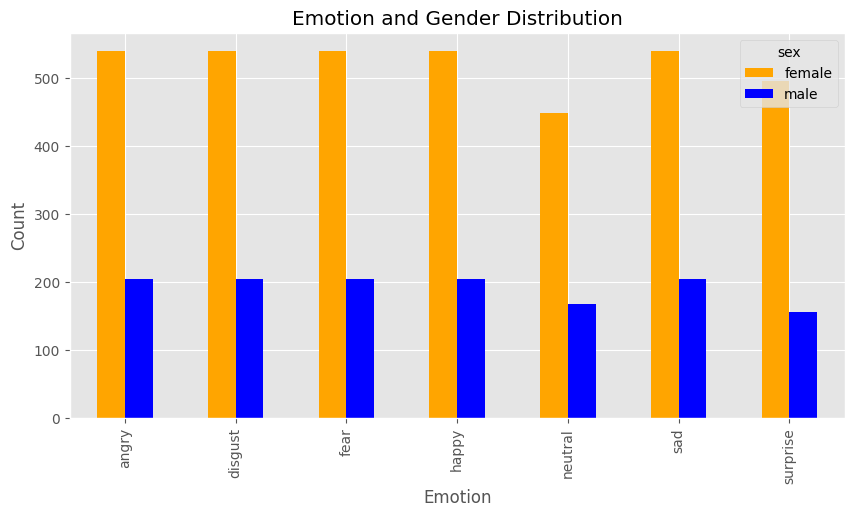

emotion
disgust     743
sad         743
fear        743
happy       743
angry       743
surprise    652
neutral     616
Name: count, dtype: int64


In [15]:
def plot_distribution(df):
    countTable = df.groupby(['emotion', 'sex']).count()
    pivotTable = countTable.pivot_table(index='emotion', columns='sex', values='path')

    pivotTable.plot(kind='bar', figsize=(10, 5), color=['orange', 'blue'])
    plt.title('Emotion and Gender Distribution')
    plt.xlabel('Emotion')
    plt.ylabel('Count')

    # Display the plot
    plt.show()

# Assuming df is your DataFrame
plot_distribution(final_df)
print(final_df.emotion.value_counts())

In [16]:
!pip install pydub

In [17]:
from pydub import AudioSegment, effects
import numpy as np

In [18]:
def preprocess_audio(path, target_length=180000):
    y, sr = librosa.load(path, sr=None)
    y_trimmed, _ = librosa.effects.trim(y, top_db=25)

    if len(y_trimmed) < target_length:
        y_padded = np.pad(y_trimmed, (0, target_length - len(y_trimmed)))
    else:
        y_padded = y_trimmed[:target_length]

    return y_padded, sr


In [19]:
emotion_encoding = {
    'neutral' : 0,
    'happy'   : 1,
    'sad'     : 2,
    'angry'   : 3,
    'fear'    : 4,
    'disgust' : 5,
    'surprise': 6
}

def encode(label):
    return emotion_encoding.get(label)


In [20]:
zcr_list = []
rms_list = []
mfccs_list = []
emotion_list = []

FRAME_LENGTH = 2048
HOP_LENGTH = 512

for row in final_df.itertuples(index=False):
    try:
        y, sr = preprocess_audio(row.path)

        zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=HOP_LENGTH)

        zcr_list.append(zcr)
        rms_list.append(rms)
        mfccs_list.append(mfccs)

        emotion_list.append(encode(row.emotion))
    except Exception as e:
        print(f"Failed for path: {row.path}")
        print(f"Error: {e}")


In [21]:
X = np.concatenate((
    np.swapaxes(zcr_list, 1, 2),
    np.swapaxes(rms_list, 1, 2),
    np.swapaxes(mfccs_list, 1, 2)),
    axis=2
)
X = X.astype('float32')

y = np.asarray(emotion_list)
y = np.expand_dims(y, axis=1).astype('int8')

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_to_split, y_train, y_to_split = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_to_split, y_to_split, test_size=0.5, random_state=1)

y_train_class = to_categorical(y_train, 7)
y_val_class = to_categorical(y_val, 7)

In [24]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, Embedding, LSTM, GRU, BatchNormalization,
    Input, Flatten, Dropout, Activation,
    Conv1D, MaxPooling1D, AveragePooling1D
)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD


In [25]:
model_lstm = Sequential()
model_lstm.add(LSTM(256,return_sequences=True,input_shape=(X_train.shape[1:3])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(128,return_sequences=True))
#model.add(Dropout(0.2
model_lstm.add(LSTM(64,return_sequences=True))
#model.add(Dropout(0.2))
model_lstm.add(LSTM(32,return_sequences=True))
model_lstm.add(Flatten())
#model.add(Dropout(0.3))
# model_lstm.add(LSTM(128))
#model.add(Dropout(0.3))
model_lstm.add(Dense(7,activation = 'softmax'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_lstm.fit(X_train, y_train_class, batch_size=64, epochs=40, validation_data=(X_val, y_val_class))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.3354 - loss: 1.6827 - val_accuracy: 0.6867 - val_loss: 0.8730
Epoch 2/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.7097 - loss: 0.7957 - val_accuracy: 0.6988 - val_loss: 0.7743
Epoch 3/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.7615 - loss: 0.6282 - val_accuracy: 0.7416 - val_loss: 0.6492
Epoch 4/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.8163 - loss: 0.5115 - val_accuracy: 0.7550 - val_loss: 0.6395
Epoch 5/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.8098 - loss: 0.5074 - val_accuracy: 0.7497 - val_loss: 0.6067
Epoch 6/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.8502 - loss: 0.4153 - val_accuracy: 0.7697 - val_loss: 0.7367
Epoch 7/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.8482 - loss: 0.3922 - val_accuracy: 0.7550 - val_loss: 0.6610
Epoch 8/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.8756 - loss: 0.3373 - val_accuracy: 0.7657 -

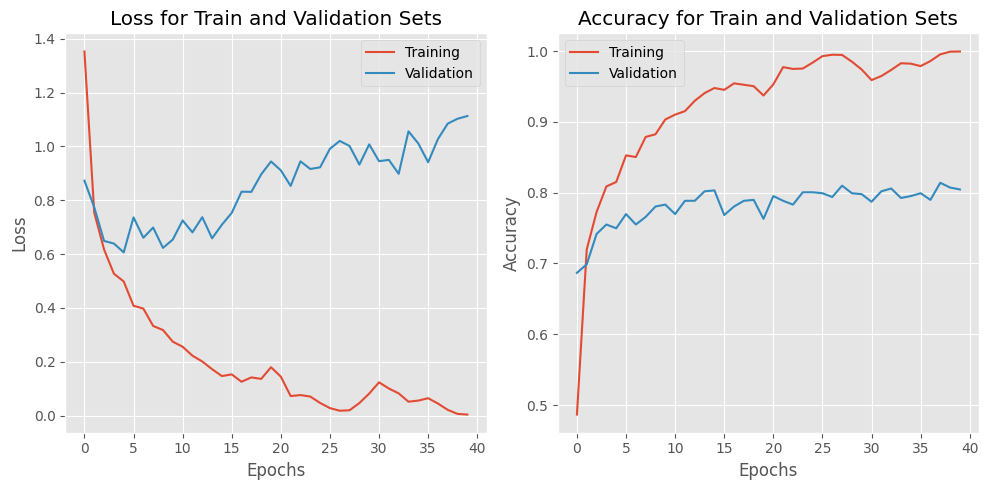

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Loss for Train and Validation Sets')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epochs')
axes[0].legend(['Training', 'Validation'])

axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Accuracy for Train and Validation Sets')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].legend(['Training', 'Validation'])

fig.tight_layout()

plt.show()

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step
Test Accuracy: 0.8142
Test Precision: 0.8164
Test Recall: 0.8142
Test F1-score: 0.8144


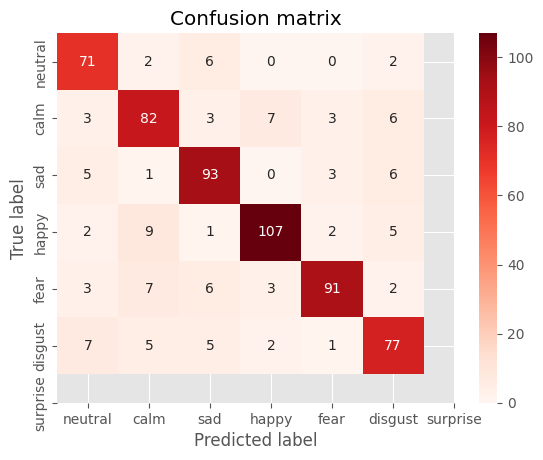

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

y_test_class = to_categorical(y_test, 7)

y_pred = np.argmax(model_lstm.predict(X_test), axis=1)
labels = ['neutral', 'calm', 'sad', 'happy', 'fear', 'disgust', 'surprise']
cm = confusion_matrix(np.argmax(y_test_class, axis=1), y_pred, labels=range(6))

# Calculate evaluation metrics
accuracy_test = accuracy_score(np.argmax(y_test_class, axis=1), y_pred)
precision_test = precision_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')
recall_test = recall_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')
f1_test = f1_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')

# Print or display the evaluation metrics
print(f'Test Accuracy: {accuracy_test:.4f}')
print(f'Test Precision: {precision_test:.4f}')
print(f'Test Recall: {recall_test:.4f}')
print(f'Test F1-score: {f1_test:.4f}')

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [28]:
import tensorflow.keras.layers as L

model_cnn = Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1:3])),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer

    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer

    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history=model_cnn.fit(X_train, y_train_class, epochs=50, validation_data=(X_val, y_val_class), batch_size=64)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 25s 196ms/step - accuracy: 0.4021 - loss: 1.8902 - val_accuracy: 0.1459 - val_loss: 31.7536
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6907 - loss: 0.8942 - val_accuracy: 0.3373 - val_loss: 5.0499
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7582 - loss: 0.6782 - val_accuracy: 0.6345 - val_loss: 1.3769
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8087 - loss: 0.5350 - val_accuracy: 0.6734 - val_loss: 1.0422
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8095 - loss: 0.5198 - val_accuracy: 0.7697 - val_loss: 0.7831
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8345 - loss: 0.4618 - val_accuracy: 0.7162 - val_loss: 0.8856
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8508 - loss: 0.4193 - val_accuracy: 0.7778 - val_loss: 0.6397
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8590 - loss: 0.3921 - val_accuracy: 0.7577 

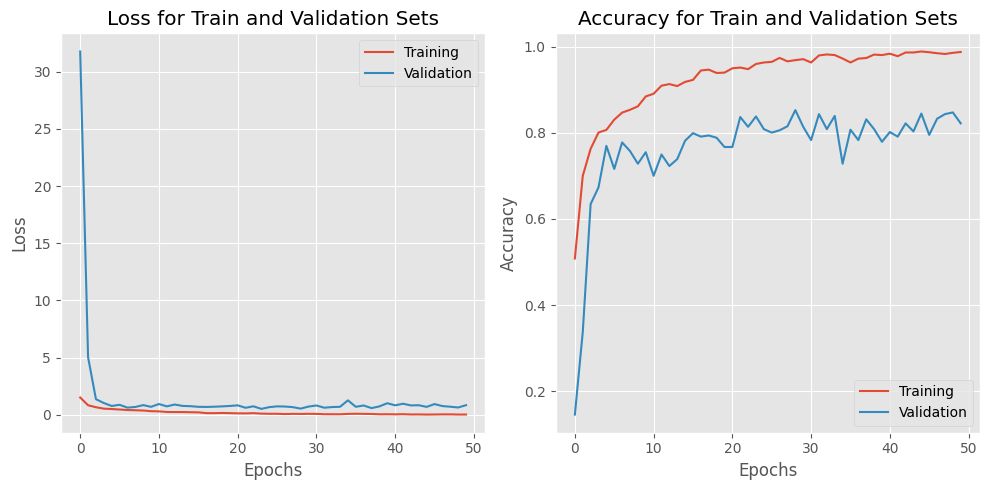

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Loss for Train and Validation Sets')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epochs')
axes[0].legend(['Training', 'Validation'])

axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Accuracy for Train and Validation Sets')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].legend(['Training', 'Validation'])

fig.tight_layout()

plt.show()

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step
Test Accuracy: 0.8342
Test Precision: 0.8394
Test Recall: 0.8342
Test F1-score: 0.8346


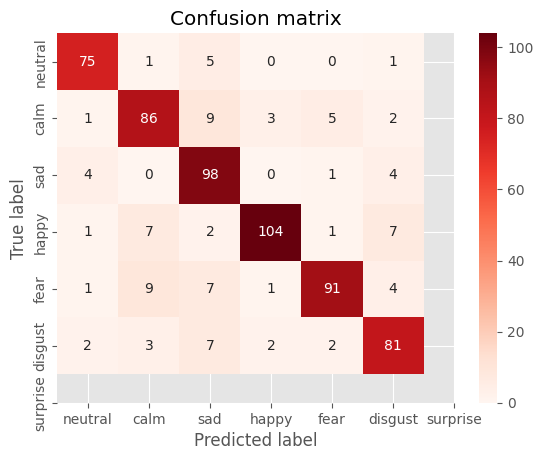

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

y_test_class = to_categorical(y_test, 7)

y_pred = np.argmax(model_cnn.predict(X_test), axis=1)
labels = ['neutral', 'calm', 'sad', 'happy', 'fear', 'disgust', 'surprise']
cm = confusion_matrix(np.argmax(y_test_class, axis=1), y_pred, labels=range(6))

# Calculate evaluation metrics
accuracy_test = accuracy_score(np.argmax(y_test_class, axis=1), y_pred)
precision_test = precision_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')
recall_test = recall_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')
f1_test = f1_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')

# Print or display the evaluation metrics
print(f'Test Accuracy: {accuracy_test:.4f}')
print(f'Test Precision: {precision_test:.4f}')
print(f'Test Recall: {recall_test:.4f}')
print(f'Test F1-score: {f1_test:.4f}')

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization

# Define model
model_clstm = Sequential()

model_clstm.add(Conv1D(1024, kernel_size=7, strides=2, padding='same', activation='relu', input_shape=(X_train.shape[1:3])))
model_clstm.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model_clstm.add(BatchNormalization())
model_clstm.add(Dropout(0.3))

model_clstm.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
model_clstm.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model_clstm.add(BatchNormalization())
model_clstm.add(Dropout(0.3))

model_clstm.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model_clstm.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model_clstm.add(BatchNormalization())
model_clstm.add(Dropout(0.3))

model_clstm.add(LSTM(128, return_sequences=True))
model_clstm.add(Dropout(0.3))

model_clstm.add(Dense(64, activation='relu'))
model_clstm.add(Flatten())
model_clstm.add(Dense(7, activation='softmax'))

model_clstm.summary()

model_clstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_clstm.fit(X_train, y_train_class, batch_size=64, epochs=40, validation_data=(X_val, y_val_class))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 176, 1024)      │       108,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 88, 1024)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 88, 1024)       │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 88, 1024)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 88, 512)        │     2,621,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 44, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 44, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 44, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 44, 256)        │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 22, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 22, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 22, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 22, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 22, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 22, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │         9,863 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,608,519 (13.77 MB)

 Trainable params: 3,604,935 (13.75 MB)

 Non-trainable params: 3,584 (14.00 KB)

Epoch 1/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.3524 - loss: 1.6385 - val_accuracy: 0.1580 - val_loss: 1.9711
Epoch 2/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.6413 - loss: 0.9610 - val_accuracy: 0.2503 - val_loss: 1.9007
Epoch 3/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.7343 - loss: 0.7120 - val_accuracy: 0.3494 - val_loss: 1.6028
Epoch 4/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.7611 - loss: 0.6171 - val_accuracy: 0.6265 - val_loss: 1.0645
Epoch 5/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.7846 - loss: 0.5533 - val_accuracy: 0.7162 - val_loss: 0.7873
Epoch 6/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.7840 - loss: 0.5831 - val_accuracy: 0.7296 - val_loss: 0.7961
Epoch 7/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.8278 - loss: 0.4687 - val_accuracy: 0.6934 - val_loss: 0.8817
Epoch 8/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.8284 - loss: 0.4568 - val_accuracy: 0.7296 - v

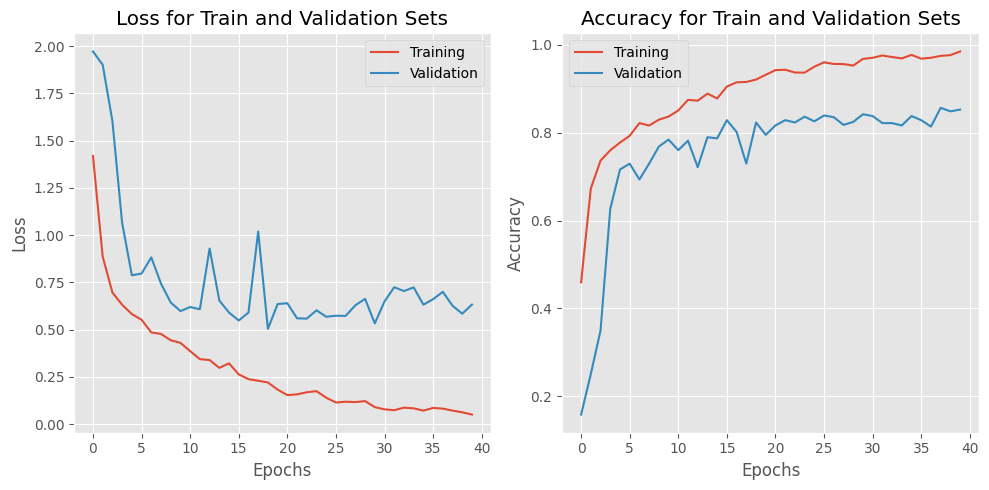

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Loss for Train and Validation Sets')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epochs')
axes[0].legend(['Training', 'Validation'])

axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Accuracy for Train and Validation Sets')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].legend(['Training', 'Validation'])

fig.tight_layout()

plt.show()

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Test Accuracy: 0.8463
Test Precision: 0.8499
Test Recall: 0.8463
Test F1-score: 0.8474


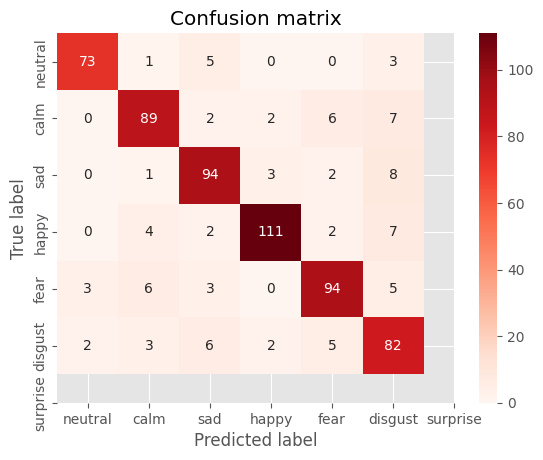

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

y_test_class = to_categorical(y_test, 7)

y_pred = np.argmax(model_clstm.predict(X_test), axis=1)
labels = ['neutral', 'calm', 'sad', 'happy', 'fear', 'disgust', 'surprise']
cm = confusion_matrix(np.argmax(y_test_class, axis=1), y_pred, labels=range(6))

# Calculate evaluation metrics
accuracy_test = accuracy_score(np.argmax(y_test_class, axis=1), y_pred)
precision_test = precision_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')
recall_test = recall_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')
f1_test = f1_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')

# Print or display the evaluation metrics
print(f'Test Accuracy: {accuracy_test:.4f}')
print(f'Test Precision: {precision_test:.4f}')
print(f'Test Recall: {recall_test:.4f}')
print(f'Test F1-score: {f1_test:.4f}')

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [36]:
# Save the trained model
model_clstm.save('model_clstm.h5')